# Google App Rating Prediction

In [262]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [263]:
data = pd.read_csv("googleplaystore 2.csv")

In [264]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [266]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [267]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [268]:
data.describe(include = "all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [270]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [271]:
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i,''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())


In [272]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


In [273]:
i = data[data['Category'] == '1.9'].index
data.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [274]:
data = data.drop(i)

In [275]:
data = data[pd.notnull(data['Last Updated'])]
data = data[pd.notnull(data['Content Rating'])]

In [276]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.00,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.00,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",0.00,Varies with device


In [277]:
# Checking if there is any null values present in Numeric Columns of the data
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [278]:
# Formatting Size coloumn and extracting numeric values
data['size_cleaned']= data['Size'].apply(lambda x: x.replace('M',''))

In [279]:
data = data.drop(data[data.size_cleaned =='Varies with device'].index)

In [280]:
data['size_cleaned']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10835    9.6
10836     53
10837    3.6
10838    9.5
10840     19
Name: size_cleaned, Length: 9145, dtype: object

In [281]:
ending = ['k']
data['size_kb']=data['size_cleaned'].map(lambda x: x[-1:] in ending)
#Removing k
data['size_cleaned']=data['size_cleaned'].apply(lambda x: x.replace('k',''))

In [282]:
data['size_cleaned']=pd.to_numeric(data['size_cleaned'])
data['size_cleaned']=data.apply(lambda x:x['size_cleaned']/1000 if x['size_kb']==1 else x.size_cleaned,axis=1)

In [283]:
data['size_cleaned']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835     9.6
10836    53.0
10837     3.6
10838     9.5
10840    19.0
Name: size_cleaned, Length: 9145, dtype: float64

In [284]:
data.drop('Size', axis=1, inplace=True)

In [285]:
data

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,19.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up,14.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,8.7,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up,25.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up,2.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0,10+,Free,0,Everyone,Business,"September 29, 2016",1.15,4.0 and up,9.6,False
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53.0,False
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,Education,"July 6, 2018",1.00,4.1 and up,3.6,False
10838,Parkinson Exercices FR,MEDICAL,4.3,3,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.00,2.2 and up,9.5,False


In [286]:
data.Reviews=pd.to_numeric(data.Reviews)

In [287]:
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10835         0
10836        38
10837         4
10838         3
10840    398307
Name: Reviews, Length: 9145, dtype: int64

In [288]:
data['Reviews'].dtype

dtype('int64')

In [289]:
data['Reviews'] = data['Reviews'].astype('float64')
data['Reviews'].dtype

dtype('float64')

In [290]:
data.Reviews=pd.to_numeric(data.Reviews)

In [291]:
# Formatting Install Column
data['Installs_formatted'] = data['Installs'].apply(lambda x:x.strip('+'),[0])

In [292]:
data['Installs_formatted'] = data['Installs_formatted'].apply(lambda x:x.replace(',',''))

In [293]:
data['Installs_formatted']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10835          10
10836        5000
10837         100
10838        1000
10840    10000000
Name: Installs_formatted, Length: 9145, dtype: object

In [294]:
data = data.drop(data[data.Installs_formatted == 'Free'].index)

In [295]:
# Converting Installs coloumn to integer
data['Installs_formatted'] = data['Installs_formatted'].astype('int64')
data['Installs_formatted'].dtype

dtype('int64')

In [296]:
data.drop('Installs', axis=1, inplace=True)

In [297]:
data.head(5)

,App,Category,Rating,Reviews,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,19.0,False,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up,14.0,False,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,8.7,False,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up,25.0,False,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up,2.8,False,100000


In [298]:
# Price column Formatting

data['Price_formatted'] = data['Price'].apply(lambda x:x.replace('$',''))

In [299]:
data['Price_formatted'] =pd.to_numeric(data['Price_formatted'])

In [300]:
data['Price_formatted']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10840    0.0
Name: Price_formatted, Length: 9145, dtype: float64

In [301]:
data.drop('Price',axis=1, inplace = True)

In [302]:
data.head(5)

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,Free,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,19.0,False,10000,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up,14.0,False,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,Free,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,8.7,False,5000000,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,Free,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up,25.0,False,50000000,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up,2.8,False,100000,0.0


Sanity Checks

In [303]:
# Average rating should be between 1 and 5 as only these values are allowed on the play store.
data.loc[data.Rating < 1] & data.loc[data.Rating > 5] # No records found

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted


In [304]:
# Reviews should not be more than installs as only those who installed can review the app

data.loc[data['Reviews'] > data['Installs_formatted']]

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,Free,Everyone,Medical,"August 2, 2018",1.072,4.0.3 and up,25.000,False,1,0.00
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4.0,Free,Everyone,Education,"July 17, 2018",1.010,4.4 and up,64.000,False,1,0.00
5812,AX Watch for WatchMaker,PERSONALIZATION,4.3,2.0,Paid,Everyone,Personalization,"August 18, 2017",1.000,2.3 and up,0.238,True,1,0.99
5917,Ra Ga Ba,GAME,5.0,2.0,Paid,Everyone,Arcade,"February 8, 2017",1.040,2.3 and up,20.000,False,1,1.49
6508,Sam.BN Pro,TOOLS,4.3,11.0,Paid,Everyone,Tools,"March 27, 2015",1.000,4.0.3 and up,2.000,False,10,0.99
6700,Brick Breaker BR,GAME,5.0,7.0,Free,Everyone,Arcade,"July 23, 2018",1.000,4.1 and up,19.000,False,5,0.00
7402,Trovami se ci riesci,GAME,5.0,11.0,Free,Everyone,Arcade,"March 11, 2017",0.100,2.3 and up,6.100,False,10,0.00
8591,DN Blog,SOCIAL,5.0,20.0,Free,Teen,Social,"July 23, 2018",1.000,4.0 and up,4.200,False,10,0.00
9096,DZ Puzzle,FAMILY,4.3,14.0,Paid,Everyone,Puzzle,"April 22, 2017",1.200,2.3 and up,47.000,False,10,0.99
10697,Mu.F.O.,GAME,5.0,2.0,Paid,Everyone,Arcade,"March 3, 2017",1.000,2.3 and up,16.000,False,1,0.99


In [305]:
# Dropping values where reviews is more than installs

df1 = data[data['Reviews']> data['Installs_formatted']].index
data.drop(labels=df1, inplace = True)

In [306]:
# Check values again

data.loc[data['Reviews'] > data['Installs_formatted']]

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted


In [307]:
# For free apps (type = “Free”), the price should not be >0.
data.loc[data['Price_formatted'] > 0] # No such record found

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,Paid,Everyone,Business,"March 25, 2018",1.52,4.0 and up,6.800,False,100000,4.99
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,Paid,Everyone,Business,"April 11, 2017",3.46,3.0 and up,39.000,False,100000,4.99
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,Paid,Everyone,Business,"March 25, 2018",1.52,4.0 and up,6.800,False,100000,4.99
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,Paid,Everyone,Business,"April 11, 2017",3.46,3.0 and up,39.000,False,100000,4.99
477,Calculator,DATING,2.6,57.0,Paid,Everyone,Dating,"October 25, 2017",1.16,4.0 and up,6.200,False,1000,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17.0,Paid,Mature 17+,Entertainment,"November 25, 2015",1.20,2.1 and up,0.157,True,100,0.99
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,Paid,Everyone,Health & Fitness,"August 8, 2018",1.93,4.2 and up,2.400,False,1000,7.99
10782,Trine 2: Complete Story,GAME,3.8,252.0,Paid,Teen,Action,"February 27, 2015",2.22,5.0 and up,11.000,False,10000,16.99
10785,"sugar, sugar",FAMILY,4.2,1405.0,Paid,Everyone,Puzzle,"June 5, 2018",2.70,2.3 and up,9.500,False,10000,1.20


In [308]:
data[np.logical_and(data['Type'] == 'Free', data['Price_formatted'] > 0)]

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted


# Univariate Analysis

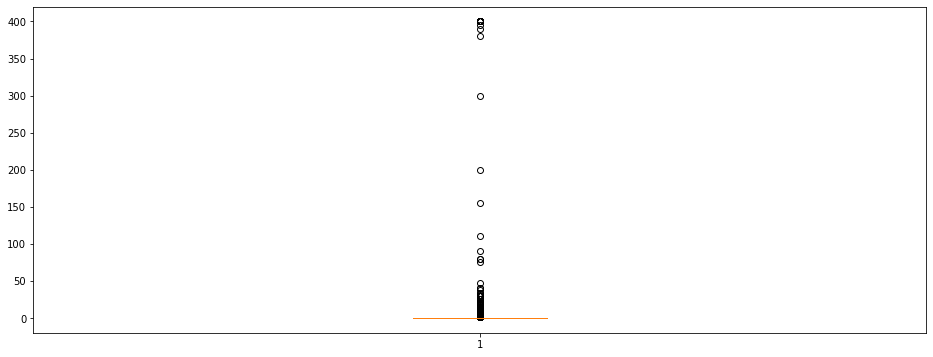

In [309]:
plt.figure(figsize=(16, 6))
plt.boxplot(data['Price_formatted'])
plt.show()
# Outliers are seen in this boxplot. 

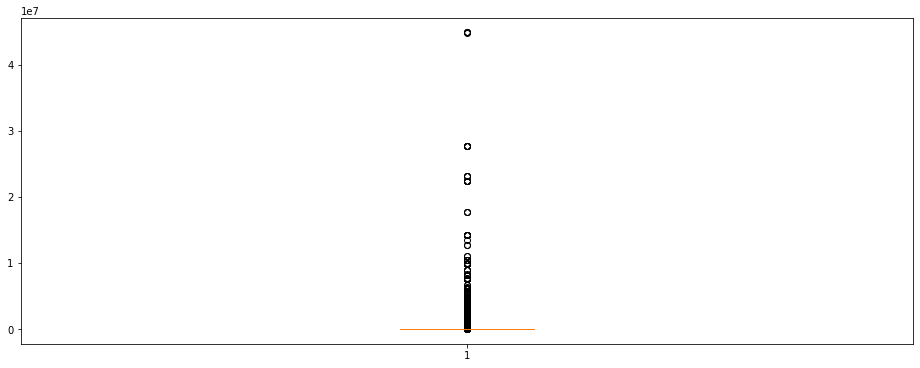

In [310]:
plt.figure(figsize=(16, 6))
plt.boxplot(data['Reviews'])
plt.show()

# Outliers in below boxplot is one or two variables which are away from sample population.

/Users/priyankakesari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


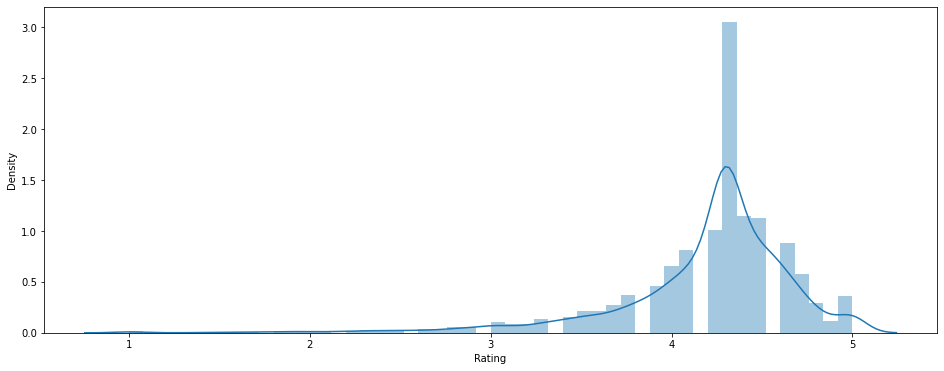

In [311]:
plt.figure(figsize=(16, 6))
sns.distplot(data['Rating'])
plt.show()

Skewness of distribution :
the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values

/Users/priyankakesari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


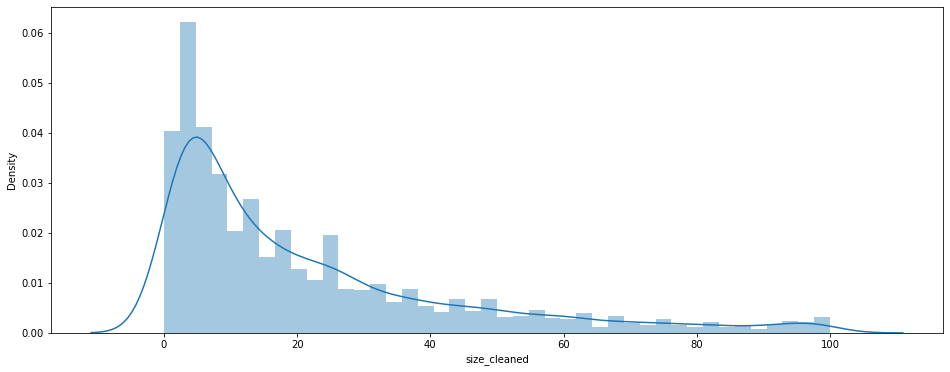

In [312]:
plt.figure(figsize=(16, 6))
sns.distplot(data['size_cleaned'])
plt.show()

Pattern is observed in this, there is a correlation between Size and Rating

In [313]:
data.loc[data['Price_formatted'] > 200]

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted
4197,most expensive app (H),FAMILY,4.3,6.0,Paid,Everyone,Entertainment,"July 16, 2018",1.00,7.0 and up,1.500,False,100,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,Paid,Everyone,Lifestyle,"March 11, 2018",1.00,4.4 and up,26.000,False,10000,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,Paid,Everyone,Lifestyle,"May 3, 2018",1.01,4.1 and up,7.300,False,10000,400.00
5351,I am rich,LIFESTYLE,3.8,3547.0,Paid,Everyone,Lifestyle,"January 12, 2018",2.00,4.0.3 and up,1.800,False,100000,399.99
5354,I am Rich Plus,FAMILY,4.0,856.0,Paid,Everyone,Entertainment,"May 19, 2018",3.00,4.4 and up,8.700,False,10000,399.99
5355,I am rich VIP,LIFESTYLE,3.8,411.0,Paid,Everyone,Lifestyle,"July 21, 2018",1.11,4.3 and up,2.600,False,10000,299.99
5356,I Am Rich Premium,FINANCE,4.1,1867.0,Paid,Everyone,Finance,"November 12, 2017",1.60,4.0 and up,4.700,False,50000,399.99
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,Paid,Everyone,Lifestyle,"July 1, 2018",1.00,4.0 and up,2.900,False,1000,379.99
5358,I am Rich!,FINANCE,3.8,93.0,Paid,Everyone,Finance,"December 11, 2017",1.00,4.1 and up,22.000,False,1000,399.99
5359,I am rich(premium),FINANCE,3.5,472.0,Paid,Everyone,Finance,"May 1, 2017",3.40,4.4 and up,0.965,True,5000,399.99


In [314]:
df2 = data[data['Price_formatted'] > 200].index
data.drop(labels=df2, inplace=True)

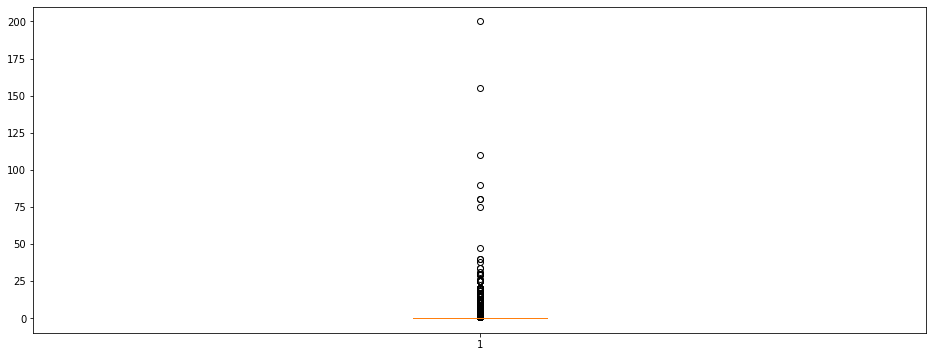

In [315]:
# Checking outliers in the data formatted
plt.figure(figsize=(16, 6))
plt.boxplot(data['Price_formatted'])
plt.show()

In [316]:
# Reviews

df3 = data[data['Reviews'] > 2000000].index

In [317]:
data.drop(labels = df3, inplace=True)

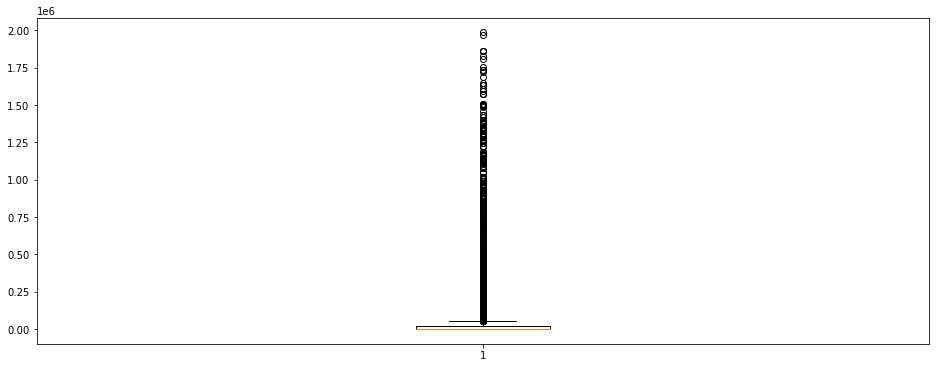

In [318]:
# Dropped very High Reviews
plt.figure(figsize=(16, 6))
plt.boxplot(data['Reviews'])
plt.show()

In [319]:
# Installs
np.percentile(data.Installs_formatted, 10)

100.0

In [320]:
np.percentile(data.Installs_formatted, 25)

1000.0

In [321]:
np.percentile(data.Installs_formatted, 50)

50000.0

In [322]:
np. percentile(data.Installs_formatted, 70)

1000000.0

In [323]:
np. percentile(data.Installs_formatted, 90)

10000000.0

In [324]:
np. percentile(data.Installs_formatted, 95)

10000000.0

In [325]:
np. percentile(data.Installs_formatted, 99)

50000000.0

In [326]:
#Threshold
percentile = data.Installs_formatted.quantile(0.95) #95th Percentile of Installs_formatted
print(percentile,"is 95th percentile of Installs_formatted")

10000000.0 is 95th percentile of Installs_formatted


In [327]:
df4 = data[data["Installs_formatted"] > percentile ].index
data.drop(labels = df4, inplace = True)

In [328]:
print(df4.value_counts().sum())

176


# Bivariate analysis

<AxesSubplot:xlabel='Price_formatted', ylabel='Rating'>

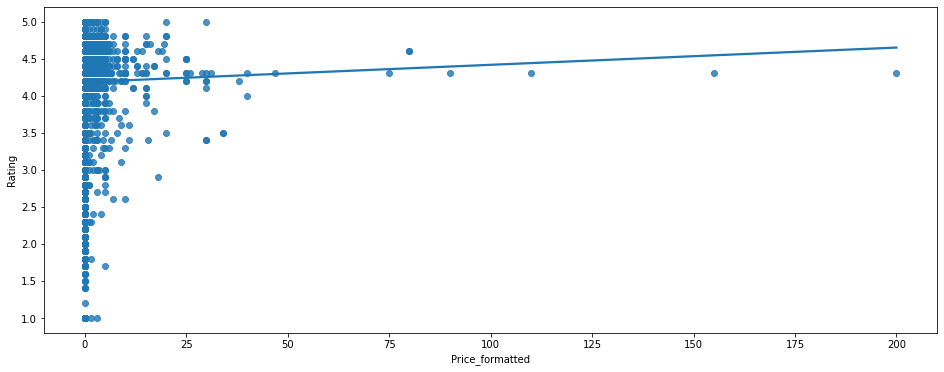

In [329]:
# Rating Vs Price
plt.figure(figsize=(16, 6))
sns.regplot(x=data['Price_formatted'], y=data['Rating'], ci =None, data= data )

Somehow Price and rating are related but not there is no positive correlation is observed

<AxesSubplot:xlabel='size_cleaned', ylabel='Rating'>

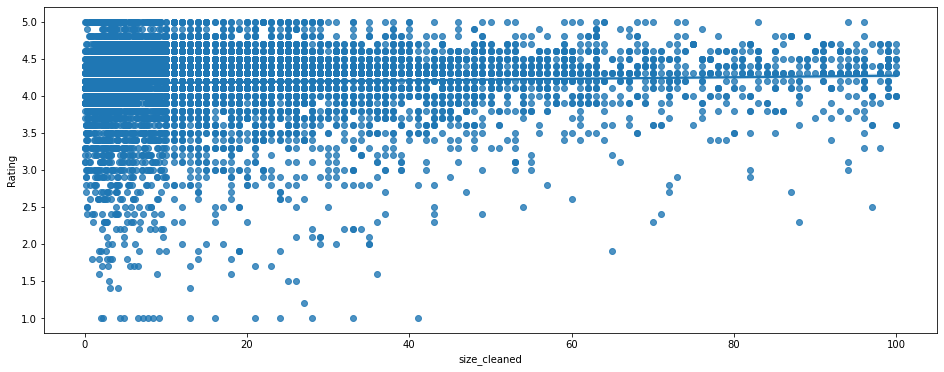

In [330]:
# Ratings vs Size
plt.figure(figsize=(16, 6))
sns.regplot(x=data['size_cleaned'], y=data['Rating'])

Negative correlation between Size and Rating is observed

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

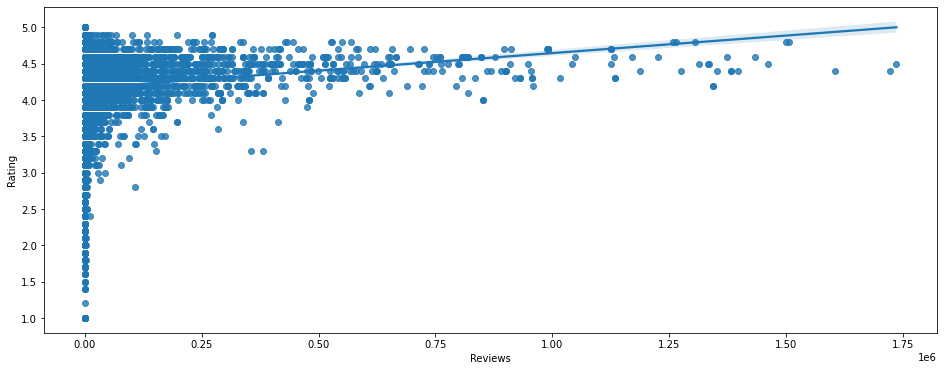

In [331]:
# Rating vs Reviews
plt.figure(figsize=(16, 6))
sns.regplot(x=data['Reviews'],y=data['Rating'])

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

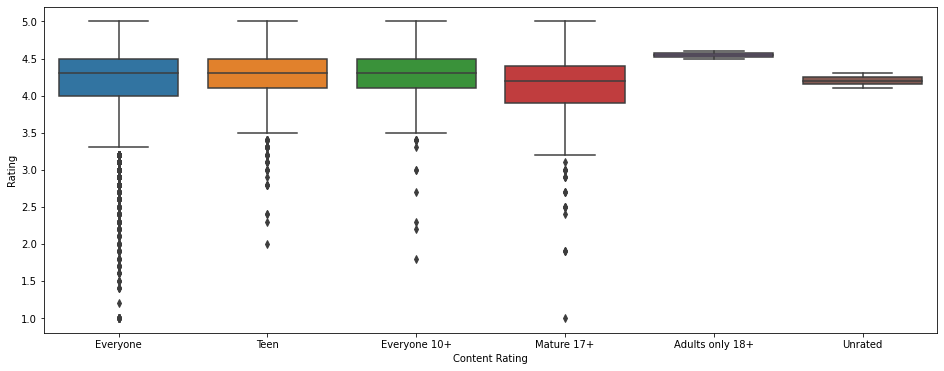

In [332]:
#Rating Vs. Content rating
plt.figure(figsize=(16, 6))
sns.boxplot(x=data['Content Rating'],y=data['Rating'],data=data)

Yes More rating means more reviews, as it has positive correlation

Yes some of the types are liked better and boxplot states more rating based on type.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

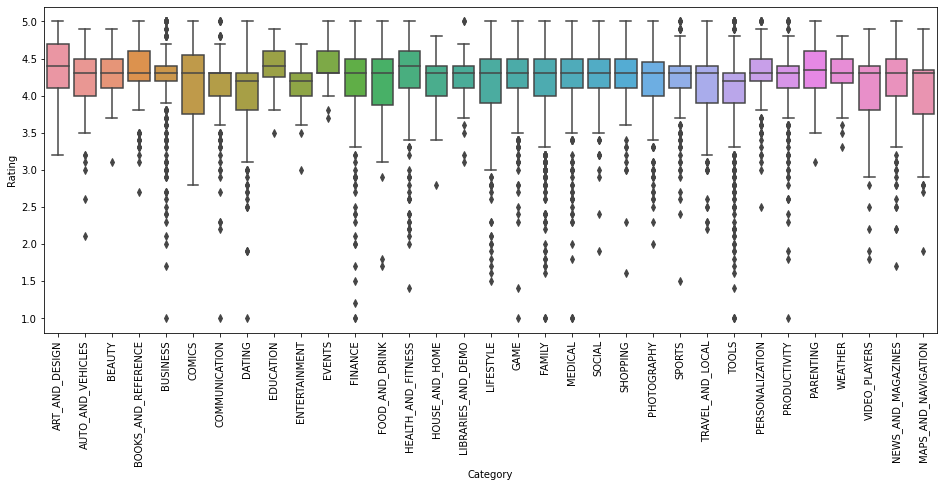

In [333]:
#Rating vs Category
plt.figure(figsize=(16, 6))
sns.boxplot(x=data['Category'],y=data['Rating'],data=data)
plt.xticks(rotation=90)

Comics as well as Art and design category genre has good rating.

## Data Preprocessing

In [334]:
inp1 = data.copy(deep=True)

In [335]:
inp1.head()

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_cleaned,size_kb,Installs_formatted,Price_formatted
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,Free,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,19.0,False,10000,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up,14.0,False,500000,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,Free,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,8.7,False,5000000,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up,2.8,False,100000,0.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,Free,Everyone,Art & Design,"March 26, 2017",1.00,2.3 and up,5.6,False,50000,0.0


In [336]:
inp1['Installs']= np.log1p(inp1['Installs_formatted'])
inp1['Reviews']= np.log1p(inp1['Reviews'])

In [337]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [338]:
inp1.head()

,Category,Rating,Reviews,Type,Content Rating,Genres,size_cleaned,size_kb,Installs_formatted,Price_formatted,Installs
0,ART_AND_DESIGN,4.1,5.075174,Free,Everyone,Art & Design,19.0,False,10000,0.0,9.210440
1,ART_AND_DESIGN,3.9,6.875232,Free,Everyone,Art & Design;Pretend Play,14.0,False,500000,0.0,13.122365
2,ART_AND_DESIGN,4.7,11.379520,Free,Everyone,Art & Design,8.7,False,5000000,0.0,15.424949
4,ART_AND_DESIGN,4.3,6.875232,Free,Everyone,Art & Design;Creativity,2.8,False,100000,0.0,11.512935
5,ART_AND_DESIGN,4.4,5.123964,Free,Everyone,Art & Design,5.6,False,50000,0.0,10.819798


In [339]:
# Dummy Columns

dummy_cols = ['Category', 'Content Rating','Genres','Type']
inp2 = pd.get_dummies(inp1, columns=dummy_cols, drop_first=True)
inp2.head()

,Rating,Reviews,size_cleaned,size_kb,Installs_formatted,Price_formatted,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Type_Paid
0,4.1,5.075174,19.0,False,10000,0.0,9.210440,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,False,500000,0.0,13.122365,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,False,5000000,0.0,15.424949,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,False,100000,0.0,11.512935,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,False,50000,0.0,10.819798,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
df_train, df_test = train_test_split(inp2, train_size=0.70, random_state=0)
df_train.shape,df_test.shape

((6106, 160), (2617, 160))

In [341]:
y_test=df_test.Rating
X_test=df_test.drop(['Rating'],axis=1)

In [342]:
y_train=df_train.Rating
X_train=df_train.drop(['Rating'],axis=1)

In [343]:
X_train.shape,X_test.shape

((6106, 159), (2617, 159))

In [344]:
y_train.shape, y_test.shape

((6106,), (2617,))

# Model Building

In [345]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [346]:
y_pred= reg.predict(X_train)
print('\nR2 on train set: %.2f' % r2_score(y_train, y_pred).round(decimals=2))


R2 on train set: 0.12


# Prediction

In [347]:
y_pred2=reg.predict(X_test)
r2=r2_score(y_test,y_pred2).round(decimals=2)

In [348]:
print('\nR2: %.2f' % r2)

print('\nMean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred2))

print("\nRoot Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred2)).round(decimals=2))


R2: 0.10

Mean Squared Error: 0.24

Root Mean Squared Error 0.49


In [349]:
dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2,'Difference':y_test-y_pred2})
dfReg

,Actual,Predicted,Difference
1181,4.7,4.186241,0.513759
10415,4.3,4.254076,0.045924
7335,4.3,4.343334,-0.043334
2556,4.4,4.141442,0.258558
7403,4.6,4.113668,0.486332
...,...,...,...
9652,4.3,4.059375,0.240625
9080,4.1,3.992997,0.107003
10547,4.3,4.325721,-0.025721
1055,4.2,4.235813,-0.035813


R2 in this is 0.10 which is quite low for a model in linear regression. We can see a positive relation between rating and features. 

Mean squared Error is 0.49 which somehow acceptable for our model.

We can observe that for some app the model predicts with zero error and has errors while predicting for others